In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CDIA_JK_dataset.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

In [4]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

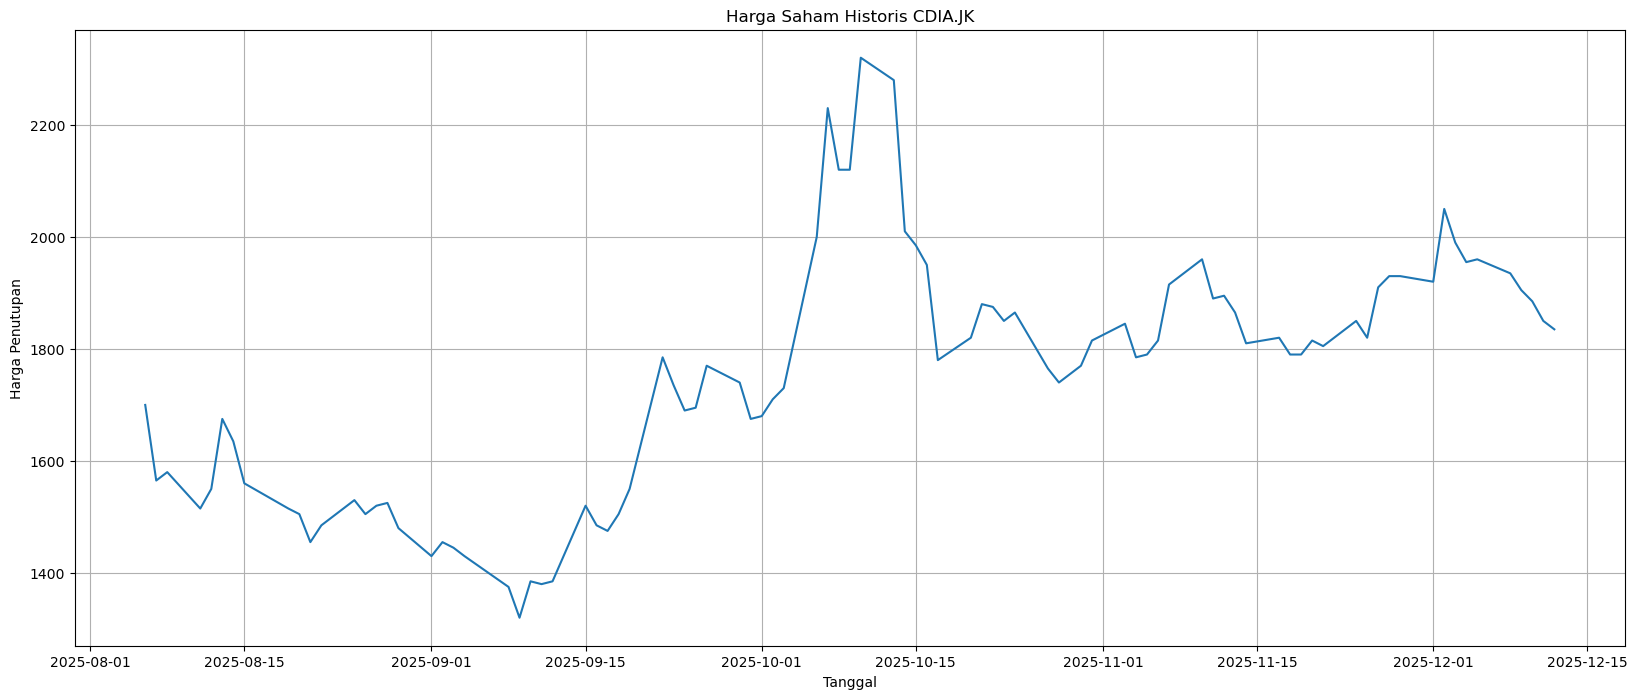

In [5]:
plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['Close'])
plt.title("Harga Saham Historis CDIA.JK")
plt.xlabel("Tanggal")
plt.ylabel("Harga Penutupan")
plt.grid(True)
plt.show()

In [6]:
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df.dropna(inplace=True)

print(df[['Date', 'Close', 'log_return']].head())

        Date   Close  log_return
1 2025-08-07  1565.0   -0.082742
2 2025-08-08  1580.0    0.009539
3 2025-08-11  1515.0   -0.042009
4 2025-08-12  1550.0    0.022839
5 2025-08-13  1675.0    0.077558


In [17]:
mu = df['log_return'].mean()     
sigma = df['log_return'].std()   
print(f"Mean : {mu}")
print(f"Volatility : {sigma}")

Mean : 0.0008490692271595815
Volatility : 0.042122902450093695


In [ ]:
S0 = df['Close'].iloc[-1]
T = 30           
N = 10000
dt = 1           

In [9]:
simulation = np.zeros((N, T))

for i in range(N):
    price = S0
    for t in range(T):
        Z = np.random.normal(0, 1)
        price = price * np.exp(
            (mu - 0.5 * sigma**2) * dt +
            sigma * np.sqrt(dt) * Z
        )
        simulation[i, t] = price

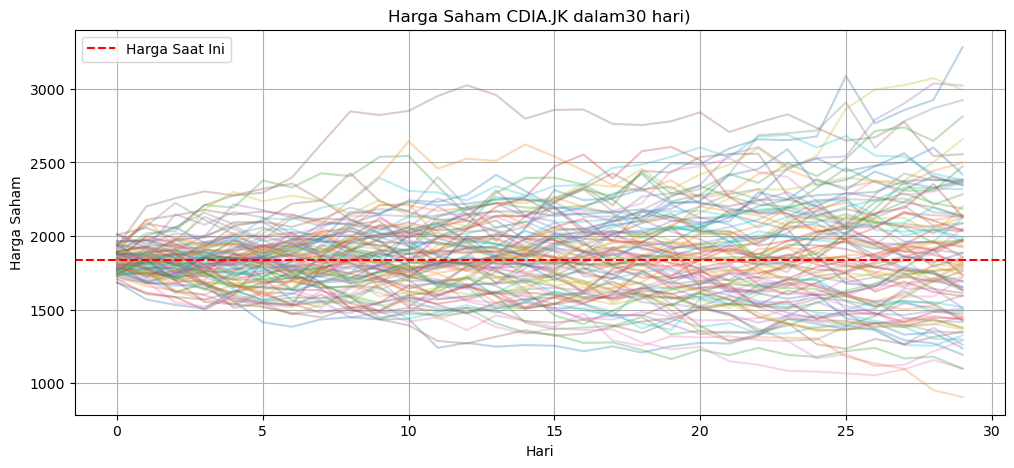

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(simulation[:100].T, alpha=0.3)
plt.axhline(S0, color='red', linestyle='--', label='Harga Saat Ini')
plt.title("Harga Saham CDIA.JK dalam30 hari)")
plt.xlabel("Hari")
plt.ylabel("Harga Saham")
plt.legend()
plt.grid(True)
plt.show()


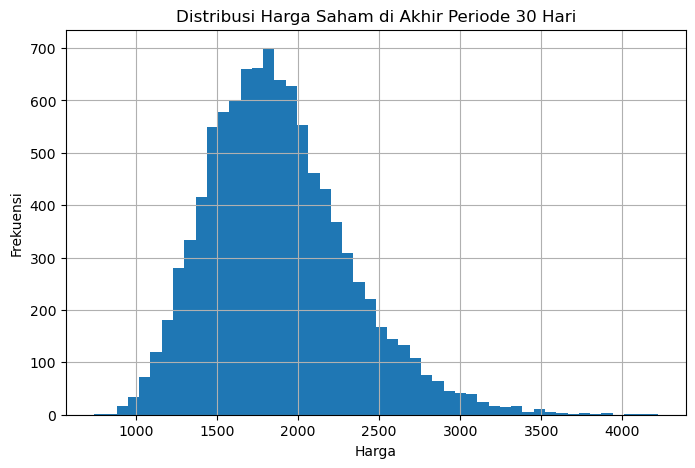

In [11]:
final_prices = simulation[:, -1]

plt.figure(figsize=(8, 5))
plt.hist(final_prices, bins=50)
plt.title("Distribusi Harga Saham di Akhir Periode 30 Hari")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()


In [14]:
prob_down = np.mean(final_prices < S0)
print(f"Probabilitas harga turun: {prob_down:.2%}")


Probabilitas harga turun: 50.11%


In [13]:
expected_price = np.mean(final_prices)
print(f"Nilai ekspektasi harga 30 hari ke depan: {expected_price:.2f}")


Nilai ekspektasi harga 30 hari ke depan: 1879.74


In [16]:
returns = (final_prices - S0) / S0
VaR_95 = np.percentile(returns, 5)

print(f"Value at Risk (95%): {VaR_95:.2%}")


Value at Risk (95%): -32.00%
